# Import Libraries

In [37]:
import sys
print(sys.executable)
print(sys.version)


c:\Users\HP\AppData\Local\Programs\Python\Python312\python.exe
3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]


In [38]:
import sklearn
print(sklearn.__version__)
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


1.6.1


# Load Data

In [39]:
import os
import zipfile

os.environ['KAGGLE_CONFIG_DIR'] = os.path.abspath('../kaggle')

!kaggle competitions download -c idealize-2025-practice-competition -p ../data/raw/

idealize-2025-practice-competition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
with zipfile.ZipFile('../data/raw/idealize-2025-practice-competition.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/raw/')  

In [41]:
df = pd.read_csv(r"..\Data\raw\train.csv")

# LETS START PREPROCESSING DATA!

## calculating missing 

In [42]:
total = len(df)

percent_missing = (df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': df.columns,
    'missing_percentage': percent_missing.round(2)
})

# Sort by missing_percentage in descending order
missing_stats = missing_stats.sort_values(by='missing_percentage', ascending=False)

# Add % sign for display
missing_stats['missing_percentage'] = missing_stats['missing_percentage'].astype(str) + '%'

missing_stats

,Column Name,missing_percentage
Sunshine,Sunshine,47.77%
Evaporation,Evaporation,42.81%
Cloud3pm,Cloud3pm,40.15%
Cloud9am,Cloud9am,37.69%
Pressure9am,Pressure9am,9.92%
Pressure3pm,Pressure3pm,9.9%
WindDir9am,WindDir9am,7.08%
WindGustDir,WindGustDir,6.58%
WindGustSpeed,WindGustSpeed,6.54%
WindDir3pm,WindDir3pm,2.7%


## visually representing Missing values

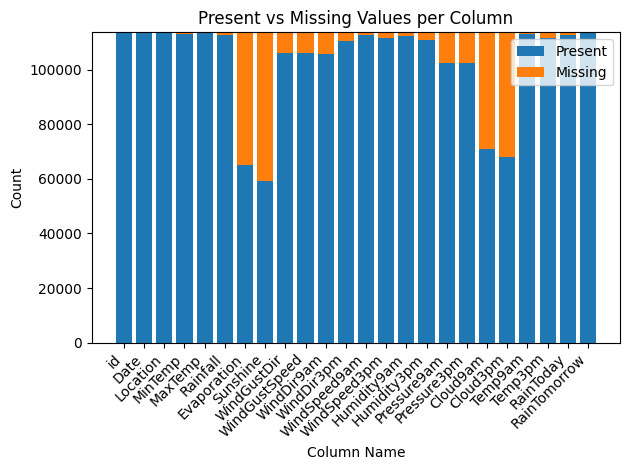

In [43]:
import matplotlib.pyplot as plt

present = df.notnull().sum()
missing = df.isnull().sum()

plt.bar(df.columns, present, label='Present')
plt.bar(df.columns, missing, bottom=present, label='Missing')
plt.xlabel('Column Name')
plt.ylabel('Count')
plt.title('Present vs Missing Values per Column')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## drop colomns

In [44]:
preprocessed_df = df.copy()

In [45]:
cols_to_drop = ['id']
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count / len(df) > 0.35:
        cols_to_drop.append(col)

preprocessed_df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {cols_to_drop}")

        

Dropped columns: ['id', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']


## thinking what to do with other missing values

In [46]:
total = len(preprocessed_df)

percent_missing = (preprocessed_df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'missing_percentage': percent_missing.round(2),
    'Data Type': preprocessed_df.dtypes
})

# Sort by missing_percentage in descending order
missing_stats = missing_stats.sort_values(by='Data Type', ascending=False)

# Add % sign for display
missing_stats['missing_percentage'] = missing_stats['missing_percentage'].astype(str) + '%'

missing_stats

,Column Name,missing_percentage,Data Type
Date,Date,0.0%,object
RainToday,RainToday,0.99%,object
WindGustDir,WindGustDir,6.58%,object
WindDir9am,WindDir9am,7.08%,object
WindDir3pm,WindDir3pm,2.7%,object
Location,Location,0.0%,object
Humidity3pm,Humidity3pm,2.55%,float64
Temp3pm,Temp3pm,1.94%,float64
Temp9am,Temp9am,0.65%,float64
Pressure3pm,Pressure3pm,9.9%,float64


## handle missing values


In [47]:
for col in preprocessed_df.columns:
    if preprocessed_df[col].dtype in ['int64', 'float64']:
        preprocessed_df[col] = preprocessed_df[col].fillna(preprocessed_df[col].mean())
    else:
        preprocessed_df[col] = preprocessed_df[col].fillna(preprocessed_df[col].mode()[0])


## check after adding missing values

In [48]:
total=len(preprocessed_df)

preprocessed_df.isnull().sum()
percent_missing = (preprocessed_df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'missing_percentage': percent_missing.round(2).astype(str) + '%'
})

missing_stats

,Column Name,missing_percentage
Date,Date,0.0%
Location,Location,0.0%
MinTemp,MinTemp,0.0%
MaxTemp,MaxTemp,0.0%
Rainfall,Rainfall,0.0%
WindGustDir,WindGustDir,0.0%
WindGustSpeed,WindGustSpeed,0.0%
WindDir9am,WindDir9am,0.0%
WindDir3pm,WindDir3pm,0.0%
WindSpeed9am,WindSpeed9am,0.0%


In [49]:
df.sample(10)

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
52397,52397,2017-02-10,MelbourneAirport,16.8,31.2,0.0,6.0,8.4,SSE,30.0,...,87.0,47.0,1012.3,1009.2,8.0,1.0,18.7,29.6,No,0
111824,111824,2015-12-22,Launceston,12.4,24.2,0.0,NaN,NaN,NW,35.0,...,48.0,38.0,NaN,NaN,8.0,3.0,16.7,23.6,No,0
74293,74293,2014-12-14,Cairns,24.2,33.5,0.0,5.0,6.9,NNE,31.0,...,52.0,40.0,1007.8,1005.3,1.0,1.0,31.4,33.1,No,0
96933,96933,2014-01-09,CoffsHarbour,17.1,25.1,3.8,1.8,NaN,WSW,26.0,...,80.0,59.0,1022.8,1021.9,7.0,7.0,19.7,23.5,Yes,1
89497,89497,2011-06-09,WaggaWagga,2.8,14.0,0.0,0.4,3.6,W,30.0,...,95.0,53.0,1019.2,1016.5,8.0,6.0,5.4,14.0,No,0
109485,109485,2016-06-14,Newcastle,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
103183,103183,2009-07-16,NorfolkIsland,13.3,18.3,2.2,3.4,0.1,NNW,57.0,...,81.0,90.0,1015.2,1012.4,8.0,8.0,14.7,16.4,Yes,1
10369,10369,2012-02-16,NorfolkIsland,17.6,25.3,0.0,5.0,9.6,E,31.0,...,61.0,65.0,1017.1,1016.4,1.0,7.0,23.9,23.3,No,0
31011,31011,2009-08-26,Cobar,6.2,18.8,0.0,4.2,11.0,W,22.0,...,51.0,30.0,1021.4,1018.4,0.0,0.0,12.0,18.1,No,0
95250,95250,2012-06-14,Townsville,9.9,24.6,0.0,3.4,10.3,NE,28.0,...,72.0,44.0,1016.8,1013.7,0.0,1.0,17.1,22.9,No,0


## split or join columns

In [50]:
preprocessed_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [51]:
#SPLIT Date INTO sub-columns: Month and Year
preprocessed_df[['Year','Month','Day']] = preprocessed_df['Date'].str.split('-', expand=True)


#drop the original Date column
preprocessed_df = preprocessed_df.drop(['Date'], axis=1)


In [52]:
preprocessed_df.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
26203,CoffsHarbour,1.6,20.0,0.0,NE,31.000000,NNW,ENE,7.0,19.000000,...,57.000000,1018.500000,1015.400000,14.1,17.700000,No,0,2016,07,26
60885,MountGinini,16.8,30.5,0.0,E,44.000000,NE,NNW,7.0,7.000000,...,29.000000,1017.660456,1015.262716,23.4,28.800000,No,0,2013,01,06
75729,Witchcliffe,24.0,37.8,0.0,SSW,37.000000,NE,SW,9.0,20.000000,...,58.000000,1012.000000,1011.500000,32.1,28.400000,No,0,2013,01,08
41091,Albury,5.7,13.8,5.4,NNE,19.000000,ENE,S,7.0,7.000000,...,76.000000,1022.200000,1020.200000,8.9,13.600000,Yes,0,2009,08,05
86129,Albany,19.4,24.1,0.0,W,39.953684,SE,SE,19.0,18.637255,...,51.505227,1017.660456,1015.262716,20.2,21.676257,No,0,2017,03,06


In [53]:
preprocessed_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

## Encoding

*only qualititive data will be encoded*

In [54]:
from sklearn.preprocessing import OneHotEncoder

## getting unique count of coloms to decide encoding techiques

In [55]:

unique_count=pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'Unique Count': [preprocessed_df[col].nunique() for col in preprocessed_df.columns],
    'data_type': [preprocessed_df[col].dtype for col in preprocessed_df.columns]
})


unique_count = unique_count.sort_values(by='data_type', ascending=False)
unique_count

,Column Name,Unique Count,data_type
0,Location,49,object
6,WindDir9am,16,object
19,Month,12,object
18,Year,11,object
16,RainToday,2,object
7,WindDir3pm,16,object
20,Day,31,object
4,WindGustDir,16,object
5,WindGustSpeed,66,float64
8,WindSpeed9am,42,float64


## check what are the unique Values

In [56]:
var = preprocessed_df["Year"].unique()
var = sorted(var)
print(var)

['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


# ML works better with Numbers

### converting some other data types to int

In [57]:
preprocessed_df['Year']=preprocessed_df['Year'].astype(int)
preprocessed_df['Month']=preprocessed_df['Month'].astype(int)


In [58]:
df.sample(10)

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
12554,12554,2013-10-01,Bendigo,12.0,15.5,6.2,4.2,NaN,W,76.0,...,70.0,54.0,1003.1,1008.3,8.0,8.0,12.8,14.7,Yes,0
29940,29940,2012-08-21,NorahHead,10.6,21.7,0.0,NaN,NaN,NNE,41.0,...,78.0,56.0,1020.7,1016.1,NaN,NaN,14.2,18.4,No,0
67741,67741,2015-03-19,Watsonia,14.2,32.8,0.0,5.8,10.1,N,65.0,...,62.0,30.0,1006.3,1002.8,2.0,2.0,21.6,31.4,No,0
56897,56897,2010-04-28,Albury,9.7,17.3,1.6,NaN,NaN,NW,30.0,...,84.0,50.0,1022.0,1019.6,1.0,1.0,12.4,16.9,Yes,0
51508,51508,2010-07-09,Watsonia,0.8,15.6,0.2,0.2,9.0,NE,24.0,...,99.0,56.0,1029.8,1026.3,0.0,3.0,2.5,14.7,No,0
48375,48375,2014-05-13,Townsville,21.2,28.0,0.8,6.8,1.7,ESE,44.0,...,66.0,62.0,1019.3,1016.1,7.0,7.0,24.1,25.4,No,1
64692,64692,2016-02-26,Walpole,12.5,25.2,0.0,NaN,NaN,SE,35.0,...,69.0,59.0,1023.5,1018.8,NaN,NaN,18.7,23.7,No,0
29881,29881,2015-05-14,GoldCoast,10.0,21.5,0.0,NaN,NaN,W,35.0,...,35.0,30.0,1022.6,1022.1,NaN,NaN,16.0,20.6,No,0
31540,31540,2013-09-20,Uluru,3.7,31.9,0.0,NaN,NaN,NE,37.0,...,14.0,6.0,1016.6,1011.4,NaN,NaN,19.8,30.2,No,0
113409,113409,2012-09-02,SalmonGums,1.7,24.6,0.0,NaN,NaN,NNW,37.0,...,51.0,25.0,NaN,NaN,NaN,NaN,16.0,24.2,No,0


### some qualitative columns has more values that it cannot be one hot encoded.So we do TARGET ENCODING

In [59]:
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
preprocessed_df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']] = target_encoder.fit_transform(preprocessed_df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']], preprocessed_df['RainTomorrow'])


In [60]:
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [61]:
import category_encoders as ce
import pandas as pd

# Example columns to encode
cols_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Dictionaries to store mappings for each column
encoding_dicts = {}

# Loop through each column, fit TargetEncoder, get mappings
for col in cols_to_encode:
    # Initialize and fit encoder for this column
    target_encoder = ce.TargetEncoder(cols=[col])
    target_encoder.fit(df[[col]], df['RainTomorrow'])
    
    # Create mapping dict for this column
    mapping = {}
    for val in df[col].dropna().unique():
        encoded_val = target_encoder.transform(pd.DataFrame({col: [val]}))[col].values[0]
        mapping[val] = encoded_val
    
    encoding_dicts[col] = mapping

# Now you have 4 dictionaries stored in encoding_dicts:
# encoding_dicts['Location'], encoding_dicts['WindGustDir'], etc.

# Example: print all mappings
for col, mapping in encoding_dicts.items():
    print(f"Mapping for {col}:")
    print(mapping)
    print()


Mapping for Location:
{'Nuriootpa': 0.2002492729538845, 'NorahHead': 0.269347168179853, 'Adelaide': 0.223257698541329, 'Katherine': 0.17131474103585656, 'Brisbane': 0.22438644331904947, 'WaggaWagga': 0.1771885521885522, 'Cairns': 0.31626754748142033, 'Wollongong': 0.24420529801324503, 'Moree': 0.14215686274509803, 'Ballarat': 0.258408531583265, 'SalmonGums': 0.16113945578231292, 'Perth': 0.2033765213977228, 'SydneyAirport': 0.2562685932851679, 'AliceSprings': 0.08013217678645188, 'Tuggeranong': 0.19093178036605657, 'Launceston': 0.23586823912159413, 'MelbourneAirport': 0.22522142555883592, 'PearceRAAF': 0.18411386593204776, 'Woomera': 0.06696982224059529, 'Hobart': 0.23830121903263862, 'GoldCoast': 0.25356244761106456, 'Penrith': 0.19864464210080474, 'Melbourne': 0.260253164556962, 'MountGinini': 0.27702702702702703, 'Newcastle': 0.2425, 'PerthAirport': 0.1936824605153782, 'Watsonia': 0.244940107393639, 'Cobar': 0.12908704883227176, 'Townsville': 0.17366490012229924, 'Williamtown': 0.2

In [62]:
import json

# Save each dictionary as a JSON file
for col, mapping in encoding_dicts.items():
    with open(rf"..\outputs\dictionaries\encoding_dict_{col}.json", "w") as f:
        json.dump(mapping, f)


In [63]:
# Print the 'Location' value for row numbers 53715 and 78442
print(preprocessed_df.loc[53715, 'Location'])
print(preprocessed_df.loc[78442, 'Location'])

0.18525245187068654
0.18525245187068654


### ONE hot encoding for Qualitative Data

In [64]:
from sklearn.preprocessing import OneHotEncoder
cols_to_encode = ['RainToday']
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = ohe.fit_transform(preprocessed_df[cols_to_encode])
encoded_columns = ohe.get_feature_names_out(cols_to_encode)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)

preprocessed_df.drop(cols_to_encode, axis=1, inplace=True)
preprocessed_df = pd.concat([preprocessed_df, encoded_df], axis=1)



In [65]:
df.sample(20)

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
37916,37916,2012-11-17,Darwin,26.3,33.1,0.0,6.6,8.7,E,56.0,...,72.0,59.0,1010.7,1006.8,6.0,3.0,30.1,32.8,No,0
35223,35223,2014-09-04,MelbourneAirport,1.7,14.6,0.0,1.8,7.7,S,30.0,...,83.0,60.0,1021.2,1019.5,7.0,7.0,8.8,13.0,No,0
96327,96327,2009-01-02,Sale,8.0,18.9,0.0,NaN,11.7,W,50.0,...,61.0,36.0,1016.2,1017.3,3.0,6.0,12.5,16.7,No,0
2286,2286,2013-12-03,Nhil,12.6,33.3,0.0,NaN,NaN,NW,56.0,...,70.0,19.0,1011.4,1007.2,NaN,NaN,17.5,32.1,No,1
30540,30540,2013-06-28,Cairns,18.4,26.7,0.0,4.8,9.6,ENE,30.0,...,67.0,59.0,1016.7,1013.4,1.0,1.0,23.1,25.6,No,0
36978,36978,2009-05-12,Townsville,19.7,27.9,3.0,3.4,7.0,NE,33.0,...,73.0,66.0,1014.9,1012.1,4.0,7.0,23.8,25.1,Yes,0
47675,47675,2015-10-04,Witchcliffe,15.0,20.0,0.0,NaN,NaN,NW,59.0,...,63.0,66.0,1018.0,1015.4,NaN,NaN,18.2,18.1,No,1
48301,48301,2010-06-18,Portland,6.4,14.8,5.6,2.2,2.6,WSW,72.0,...,93.0,88.0,1013.0,1009.9,6.0,8.0,8.8,13.5,Yes,1
110698,110698,2011-03-08,Sale,9.9,30.3,0.0,5.2,3.0,WNW,28.0,...,74.0,37.0,1013.0,1010.3,7.0,7.0,17.6,28.9,No,0
16601,16601,2011-10-02,AliceSprings,7.2,23.1,0.0,6.6,5.8,ENE,39.0,...,22.0,15.0,1017.2,1012.9,7.0,7.0,16.3,21.6,No,0


### analyzing

In [66]:
print(preprocessed_df['RainTomorrow'].value_counts())

RainTomorrow
0    88252
1    25502
Name: count, dtype: int64


In [67]:
print(preprocessed_df['RainToday_Yes'].value_counts())

RainToday_Yes
0.0    88619
1.0    25135
Name: count, dtype: int64


# Scaling

*scaling is for numerical features only*

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
target_column = 'RainTomorrow'

columns_to_scale = []

for column in preprocessed_df.columns:
    if column != target_column and preprocessed_df[column].dtype != 'object':
        columns_to_scale.append(column)

scaler = StandardScaler()

preprocessed_df[columns_to_scale] = scaler.fit_transform(preprocessed_df[columns_to_scale])


In [70]:
preprocessed_df.sample(20)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month,Day,RainToday_Yes
95145,1.421865,1.631295,0.925364,-0.277685,-0.915235,0.765704,-0.992139,-0.324897,0.908731,0.844813,...,6.570024e-01,-5.131565e-01,-0.518443,1.547132,9.635208e-01,0,1.273883,-0.703332,23,-0.532569
19071,-0.816393,-0.418168,1.375311,-0.277685,0.079248,-1.368384,-1.325259,0.782207,-0.791290,-1.335278,...,-1.339111e+00,1.689849e-01,-0.114195,0.173294,1.501740e+00,0,0.880603,0.173218,22,-0.532569
113363,1.186102,-1.873131,-1.380618,-0.230635,-1.371277,-1.063514,0.574642,-1.186088,-1.584634,-0.417345,...,2.675168e-01,1.251514e+00,0.933855,-1.740816,-1.305729e+00,0,-0.299239,-0.118965,11,-0.532569
65784,0.453618,0.583096,-0.002653,-0.277685,1.301793,1.223009,1.761797,1.574738,0.115388,1.074297,...,9.004309e-01,-5.873023e-01,-1.102356,0.265913,-1.109278e-02,0,0.094042,-0.118965,02,-0.532569
42694,-0.430376,0.191977,-0.691636,0.239863,-0.915235,-1.063514,-0.992139,-1.371700,-0.904625,-1.105795,...,1.387288e+00,-6.614482e-01,-0.219000,-0.475033,-8.693346e-01,1,-0.692519,1.341951,03,1.877690
81269,-0.369607,-0.543327,0.714451,-0.277685,0.232281,-0.225122,-0.324045,0.044164,-0.337951,0.041622,...,-1.582540e+00,8.000992e-02,-0.159111,0.034367,8.471491e-01,0,-1.479080,1.634134,06,-0.532569
62721,-0.513481,0.238912,1.305007,-0.277685,-1.371277,-0.225122,-0.324045,1.574738,-0.564621,-0.876311,...,-7.548828e-01,-1.275983e-01,-0.398666,0.235040,1.312636e+00,0,1.667164,-1.579881,27,-0.532569
78045,-0.483423,-1.701039,-1.099401,-0.277685,0.079248,0.232182,0.574642,1.390112,-1.584634,0.385847,...,1.241231e+00,-3.796941e-01,-0.413638,-1.586452,-1.669391e+00,1,-0.692519,0.173218,19,-0.532569
71211,0.309131,-0.652840,-0.719757,-0.277685,0.232281,0.613269,0.816785,0.782207,-1.131295,0.156364,...,-8.035685e-01,-8.311086e-02,-0.054306,-0.799197,-5.929517e-01,0,1.667164,-0.118965,25,-0.532569
38102,0.556931,-0.386879,-0.607271,-0.277685,1.064701,1.756531,0.574642,1.409397,0.682062,1.418522,...,-3.167115e-01,-4.686691e-01,-1.087384,-0.490470,-6.511375e-01,0,1.273883,0.465401,09,-0.532569


## To Pickle

In [71]:
preprocessed_df.to_csv(r'..\Data\processed\preprocessed_train.csv', index=False)